In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [ ]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("merge_sort_cali_files/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:08<00:00, 30.05it/s]


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.754 main
├─ 0.001 MPI_Allgather
├─ 0.061 MPI_Barrier
├─ 0.001 MPI_Bcast
├─ 0.094 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init_thread
├─ 0.000 MPI_Initialized
├─ 0.005 comm
│  └─ 0.005 comm_large
│     ├─ 0.000 MPI_Get_count
│     ├─ 0.000 MPI_Probe
│     ├─ 0.000 MPI_Recv
│     ├─ 0.005 MPI_Scatterv
│     └─ 0.000 MPI_Send
├─ 0.006 comp
│  └─ 0.006 comp_large
├─ 0.013 correctness_check
└─ 0.069 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.75 indices: {'profile': 15717356})
█ 1.58 - 1.75
█ 1.23 - 1.58
█ 0.88 - 1.23
█ 0.53 - 0.88
█ 0.18 - 0.53
█ 0.00 - 0.18

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
tk.metadata.head(10)

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15717356,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/1048576-128-Random.cali,true,true,true,true,1730261347,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 1048576, Random]",c,merge,mpi,int,4,1048576,Random,128,strong,19,handwritten
25682441,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/268435456-16-Random.cali,true,true,true,true,1730260192,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 268435456, Random]",c,merge,mpi,int,4,268435456,Random,16,strong,19,handwritten
30726089,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/16777216-16-Sorted.cali,true,true,true,true,1730260068,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 16777216, Sorted]",c,merge,mpi,int,4,16777216,Sorted,16,strong,19,handwritten
31774118,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/4194304-16-Perturbed.cali,true,true,true,true,1730260048,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 4194304, Perturbed]",c,merge,mpi,int,4,4194304,Perturbed,16,strong,19,handwritten
70420187,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/4194304-256-Perturbed.cali,true,true,true,true,1730261867,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 4194304, Perturbed]",c,merge,mpi,int,4,4194304,Perturbed,256,strong,19,handwritten
70634038,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/67108864-32-Random.cali,true,true,true,true,1730260600,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 67108864, Random]",c,merge,mpi,int,4,67108864,Random,32,strong,19,handwritten
154555591,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/268435456-64-Reverse.cali,true,true,true,true,1730261188,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 268435456, Reverse]",c,merge,mpi,int,4,268435456,Reverse,64,strong,19,handwritten
181687928,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/268435456-128-Reverse.cali,true,true,true,true,1730261547,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 268435456, Reverse]",c,merge,mpi,int,4,268435456,Reverse,128,strong,19,handwritten
196165593,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,mycaliFiles/4194304-128-Sorted.cali,true,true,true,true,1730261388,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 4194304, Sorted]",c,merge,mpi,int,4,4194304,Sorted,128,strong,19,handwritten


Group Performance data by `matrix_size` in the Thicket metadata table.

In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_size,input_type
0,"{'name': 'main', 'type': 'function'}",15717356,1.0,regionprofile,1.747298,1.762335,1.754341,224.555691,0.000013,1.573931,1.600648,1.584610,202.830083,NaN,NaN,NaN,NaN,main,128,1048576,Random
1,"{'name': 'main', 'type': 'function'}",25682441,1.0,regionprofile,54.973788,54.977136,54.975917,879.614680,0.000001,0.773915,0.787007,0.779457,12.471310,NaN,NaN,NaN,NaN,main,16,268435456,Random
2,"{'name': 'main', 'type': 'function'}",30726089,1.0,regionprofile,2.465361,2.474045,2.472472,39.559554,0.000008,0.859664,0.877152,0.873118,13.969887,NaN,NaN,NaN,NaN,main,16,16777216,Sorted
3,"{'name': 'main', 'type': 'function'}",31774118,1.0,regionprofile,1.234104,1.237951,1.236401,19.782410,0.000002,0.734175,0.738966,0.736728,11.787642,NaN,NaN,NaN,NaN,main,16,4194304,Perturbed
4,"{'name': 'main', 'type': 'function'}",70420187,1.0,regionprofile,2.105711,2.122641,2.113954,541.172101,0.000018,1.691373,1.761685,1.721814,440.784268,NaN,NaN,NaN,NaN,main,256,4194304,Perturbed


In [11]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

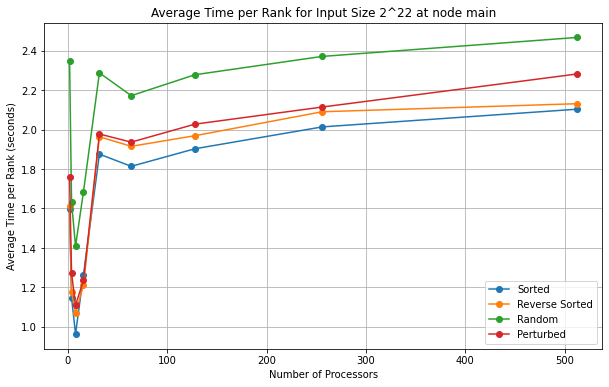

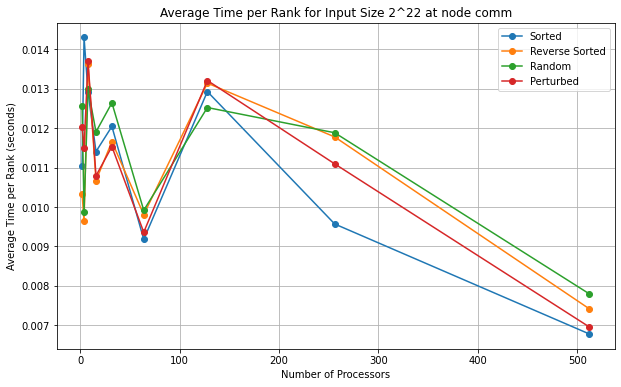

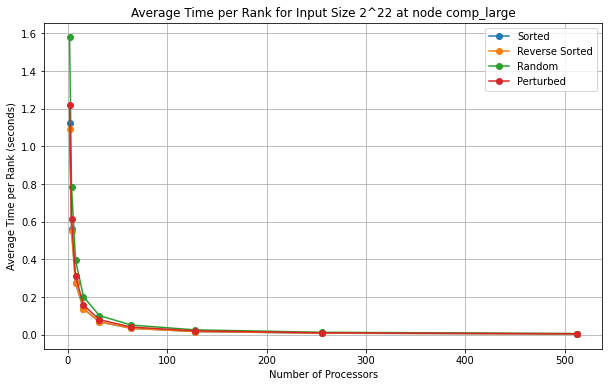

In [21]:
# input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
#                 2^16    2^18    2^20     2^22      2^24     2^26        2^28
input_sizes = [4194304]

# Function to plot average time for strong scaling
def plot_strong_scaling_average_time(tk, input_sizes):
    input_type_labels = {"Sorted": "Sorted", "Reverse": "Reverse Sorted", "Random": "Random", "Perturbed": "Perturbed"}
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name in ['comp_large', 'comm', 'main']:  # Focus only on these nodes for simplicity
            for input_size in input_sizes:
                fig, ax = plt.subplots(figsize=(10, 6))
                for input_type in ["Sorted", "Reverse", "Random", "Perturbed"]:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["input_size"] == input_size) &
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    ax.plot(data["num_procs"], data["Avg time/rank"], marker='o', label=input_type_labels[input_type])

                ax.set_title(f'Average Time per Rank for Input Size 2^22 at node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Average Time per Rank (seconds)')
                ax.legend()
                plt.grid(True)
                plt.show()

# Assuming your input sizes array and the Thicket object (tk) are already defined
plot_strong_scaling_average_time(tk, input_sizes)

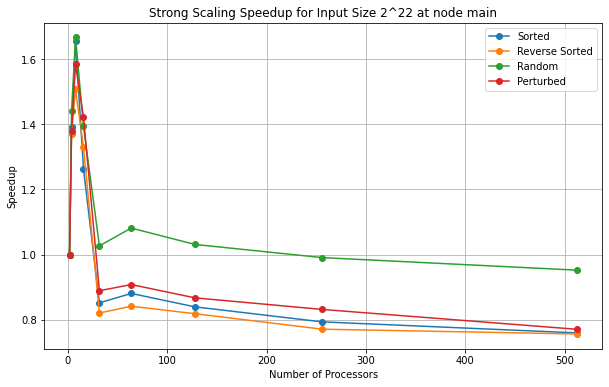

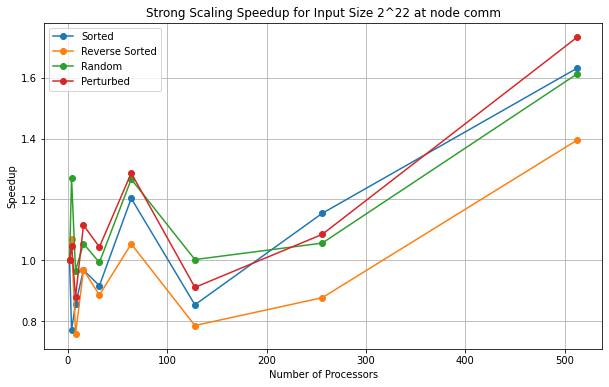

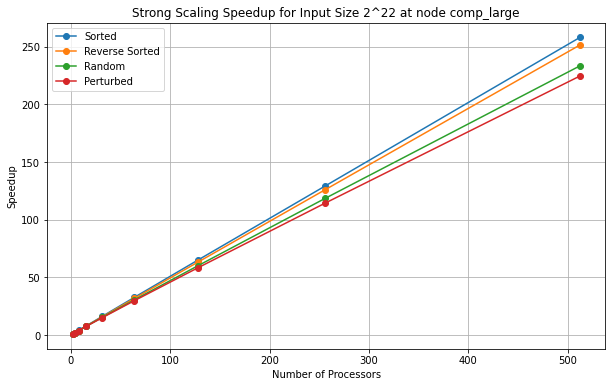

In [22]:
# Function to plot strong scaling speedup for each input type
def plot_strong_scaling_speedup(tk, input_sizes):
    input_type_labels = {"Sorted": "Sorted", "Reverse": "Reverse Sorted", "Random": "Random", "Perturbed": "Perturbed"}
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name in ['comp_large', 'comm', 'main']:  # Focus only on these nodes for simplicity
            for input_size in input_sizes:
                fig, ax = plt.subplots(figsize=(10, 6))
                for input_type in ["Sorted", "Reverse", "Random", "Perturbed"]:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["input_size"] == input_size) &
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    if not data.empty and 'num_procs' in data.columns and 'Avg time/rank' in data.columns:
                        base_time = data[data["num_procs"] == data["num_procs"].min()]["Avg time/rank"].iloc[0]
                        speedup = base_time / data["Avg time/rank"]
                        ax.plot(data["num_procs"], speedup, marker='o', label=input_type_labels[input_type])

                ax.set_title(f'Strong Scaling Speedup for Input Size 2^22 at node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()
                plt.grid(True)
                plt.show()

# Assuming your input sizes array and the Thicket object (tk) are already defined
plot_strong_scaling_speedup(tk, input_sizes)

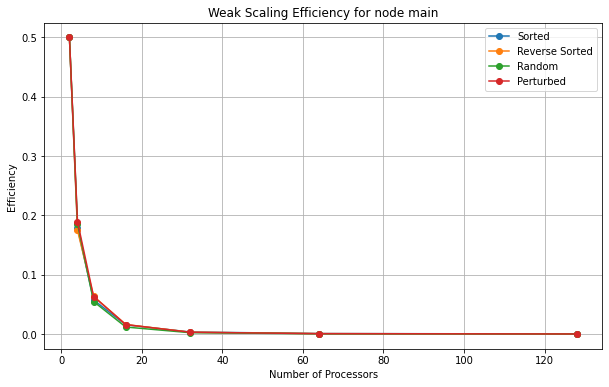

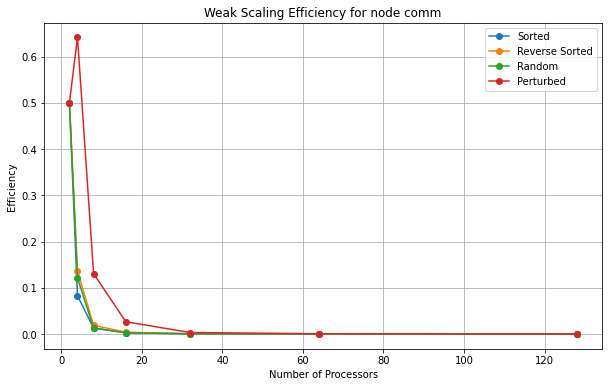

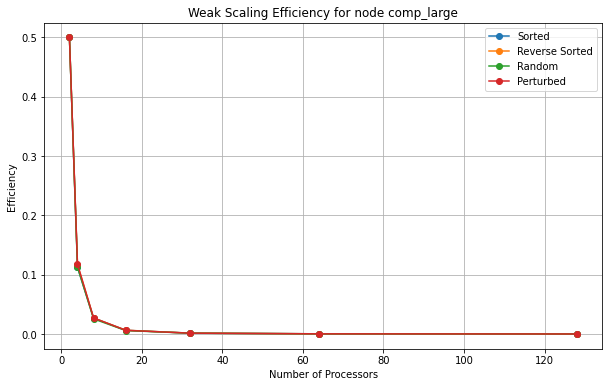

In [23]:
def plot_weak_scaling_efficiency(tk):
    input_type_labels = {"Sorted": "Sorted", "Reverse": "Reverse Sorted", "Random": "Random", "Perturbed": "Perturbed"}
    num_procs = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]  

    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if node_name in ['comp_large', 'comm', 'main']:
            fig, ax = plt.subplots(figsize=(10, 6))
            for input_type in ["Sorted", "Reverse", "Random", "Perturbed"]:
                efficiencies = []
                proc_list = []
                base_time = None  # Initialize base_time for the smallest configuration

                for size, proc in zip(input_sizes, num_procs):
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) &
                        (tk.dataframe["input_size"] == size) &
                        (tk.dataframe["num_procs"] == proc) &
                        (tk.dataframe['node'] == node)
                    ]

                    if not data.empty:
                        current_time = data["Avg time/rank"].mean()
                        if proc == 2:  # Use the smallest num_procs for the baseline time
                            base_time = current_time
                        
                        if base_time:
                            efficiency = base_time / (current_time * proc)
                            efficiencies.append(efficiency)
                            proc_list.append(proc)
                    else:
                        print(f"No data available for input_type {input_type_labels[input_type]}, input size {size}, processors {proc}")
                        efficiencies.append(None)
                        proc_list.append(proc)

                # Plotting only if there are valid efficiencies
                valid_efficiencies = [e for e in efficiencies if e is not None]
                valid_procs = [p for p, e in zip(proc_list, efficiencies) if e is not None]
                if valid_efficiencies:
                    ax.plot(valid_procs, valid_efficiencies, marker='o', label=input_type_labels[input_type])

            ax.set_title(f'Weak Scaling Efficiency for node {node_name}')
            ax.set_xlabel('Number of Processors')
            ax.set_ylabel('Efficiency')
            ax.legend()
            plt.grid(True)
            plt.show()

# Call the function to plot weak scaling efficiency
plot_weak_scaling_efficiency(tk)